# Project COMP 262
## Natural Language processing and recommender systems

School of Engineering Technology and Applied Science

Information and Communication Engineering Technology

23F --Natural Language & Recom Sys (SEC. 001) - COMP262001_2023F

Team #5: 

1. Ronald Saenz - 301218602
2. Manipal Sidhu - 300859319
3. Radmy Rafia Mahpara - 301176893
4. Kanishka Dhir - 301220757
5. Kaushalkumar Pandya

## Team #5: Gift cards

Exercise requirements:

Phase #1


1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative. For example, look at:
    - a. Counts, averages
    - b. Distribution of the number of reviews across products
    - c. Distribution of the number of reviews per product
    - d. Distribution of reviews per user

2. Text basic pre-processing:
    - a. Randomly select 1000 reviews from your dataset and perform steps b through d.
    - b. Label your data based on the value of “rating of the product” i.e. as follows:
        - i. Ratings 4,5: Positive
        - ii. Rating 3: Neutral
        - iii. Ratings 1,2: Negative
    - c. Chose the appropriate columns for your sentiment analyzer. (Give this some thought)

3. Study the below three Lexicons packages and choose two for model building justify why you chose them:
    - i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find out more information here: https://github.com/cjhutto/vaderSentiment
    - ii. TextBlob you can find out more information here: https://textblob.readthedocs.io/en/dev/quickstart.html
    - iii. SENTIWORDNET you can find more information here: http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf
    
4. Pre-process your text as needed, justify each pre-processing step for each model you chose.

5. Modeling (Sentiment Analysis) Lexicon approach:
    - a. Build two sentiment analysis models using the labeled pre-processed data for both the lexicons packages the team selected in step #3 above.

6. Validate the results of both models and provide a comparision table.

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

## Data Overview
1. <b>reviewerID</b> - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. <b>asin</b> - ID of the product, e.g. 0000013714 (Amazon Standard Identification number)
3. <b>reviewerName</b> - name of the reviewer
4. <b>vote</b> - helpful votes of the review
5. <b>style</b> - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
6. <b>reviewText</b> - text of the review
7. <b>overall</b> - rating of the product
8. <b>summary</b> - summary of the review
9. <b>unixReviewTime</b> - time of the review (unix time)
10. <b>reviewTime</b> - time of the review (raw)
11. <b>image</b> - images that users post after they have received the product

In [2]:
# Configuration by default
pd.set_option("max_colwidth", None)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

#pip install contractions
#pip install vaderSentiment
#pip install textblob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kanishka_Dhir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kanishka_Dhir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kanishka_Dhir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kanishka_Dhir\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load dataset

df = pd.read_json("Gift_Cards_5.json", lines=True)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN
2968,4,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN
2969,5,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift,1528416000,NaN,NaN
2970,5,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN


## 1. Dataset Exploration

In [4]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [5]:
# Show stats

df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


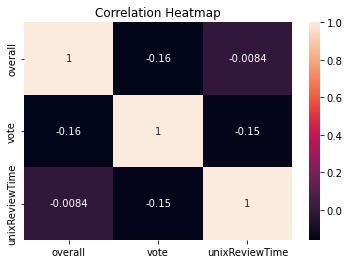

In [6]:
#correlation
correlation = df[['overall', 'vote', 'unixReviewTime']].corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

5    2752
4     154
3      33
1      22
2      11
Name: overall, dtype: int64


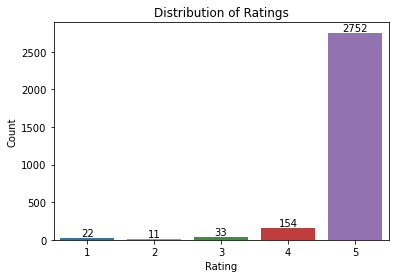

In [7]:
#overall count distribution
print(df['overall'].value_counts())
ax = sns.countplot(data=df, x='overall')
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [8]:
# Overall Average
df['overall'].mean()

4.885262449528937

True     2838
False     134
Name: verified, dtype: int64


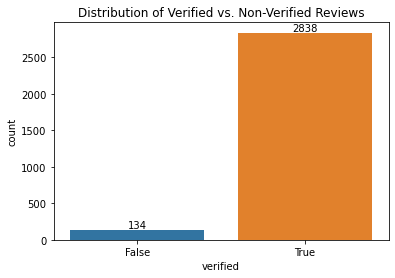

In [9]:
#verified reviews count distribution
print(df['verified'].value_counts())
ax = sns.countplot(data=df, x='verified')
plt.title("Distribution of Verified vs. Non-Verified Reviews")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


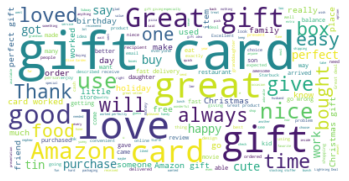

In [10]:
#wordcloud for reviewText
from wordcloud import WordCloud

text = " ".join(review for review in df['reviewText'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A1U1G73EI5IRZF    32
A13H0YP0J8PM6V    28
A3OHGWD8LIDZ8K    22
A2RTTRR421J9KG    19
A1SVYJFIASQ46Z    19
                  ..
ASJ7USDIR4PL0      5
A3OZ1Q3VI8H8EO     5
AIG7PZQOVH31T      5
A2M5PNYYFWSJMD     5
A2RV5MAIOHKMW0     5
Name: reviewerID, Length: 458, dtype: int64


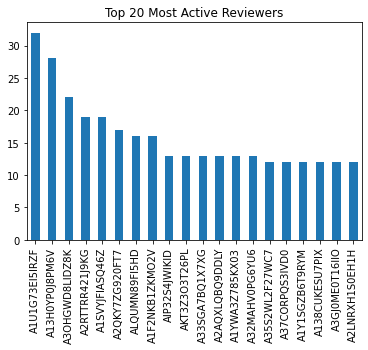

In [11]:
#Top Active Reviewers
print(df['reviewerID'].value_counts())
df['reviewerID'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Active Reviewers")
plt.show()


B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
              ..
B016J1LGPG     5
B01CT5PHJ2     5
B00BXLSPGQ     5
B0188LOK7G     5
B01B25LU7S     4
Name: asin, Length: 148, dtype: int64


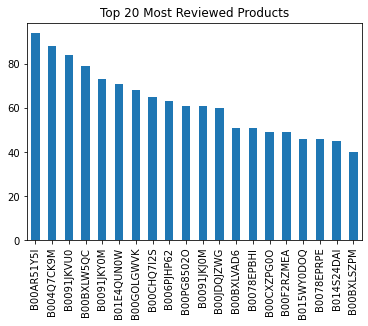

In [12]:
#Most Reviewed Products
print(df['asin'].value_counts())
df['asin'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Reviewed Products")
plt.show()


In [13]:
#average review length
average_review_length = df['reviewText'].str.len().mean()
print(f"Average review length: {average_review_length:.2f} characters")

Average review length: 67.47 characters


## 2. Text Basic Pre-processing

In [14]:
# unixReviewTime and vote, both are not related with overall, so we can drop them

#removing all the non-verified reviews
df = df[df['verified'] == True]

#dropping unwanted columns
df = df.drop(columns=['verified','reviewerID', 'asin', 'reviewerName','reviewTime', 'style', 'unixReviewTime', 'vote', 'image'])
df

,overall,reviewText,summary
0,5,Another great gift.,Five Stars
1,4,Gift card for my daughter,Ease of use
2,5,Nice present,Five Stars
3,5,My niece loved this birthday greeting/gift card.,Love the convenience of eCards
4,5,fine as a gift.,Five Stars
...,...,...,...
2967,5,"Not much to say, gift card is as good as cash!",gift card is as good as cash
2968,4,Nice gift card,Four Stars
2969,5,Gift,Great Gift
2970,5,Pretty good!,Pretty good!


In [15]:
# Drop duplicates 
df = df.drop_duplicates()
df

,overall,reviewText,summary
0,5,Another great gift.,Five Stars
1,4,Gift card for my daughter,Ease of use
2,5,Nice present,Five Stars
3,5,My niece loved this birthday greeting/gift card.,Love the convenience of eCards
4,5,fine as a gift.,Five Stars
...,...,...,...
2963,5,Enjoyed by recipient and nice that it can be used at multiple stores.,Five Stars
2964,5,Christmas stocking gift. Loved it,Arrives fast
2965,5,Perfect gift for any occasion,Five Stars
2966,5,This was bought from me--no complaints. Very cute!,Adorable!


In [16]:
print('Number of Duplicated:', 2838-1946)

Number of Duplicated: 892


In [17]:
#Labelling data from Overall Ratings
def label_rating(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"


df['label'] = df['overall'].apply(label_rating)

df['reviewText'] = df['reviewText'].astype(str)
df['review_len'] = df['reviewText'].apply(len)

# combining reviewText and summary column
df['text'] = df['reviewText'] + ' ' + df['summary']
df

C:\Users\KANISH~1\AppData\Local\Temp/ipykernel_32/1809895291.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['overall'].apply(label_rating)
C:\Users\KANISH~1\AppData\Local\Temp/ipykernel_32/1809895291.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].astype(str)
C:\Users\KANISH~1\AppData\Local\Temp/ipykernel_32/1809895291.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,overall,reviewText,summary,label,review_len,text
0,5,Another great gift.,Five Stars,Positive,19,Another great gift. Five Stars
1,4,Gift card for my daughter,Ease of use,Positive,25,Gift card for my daughter Ease of use
2,5,Nice present,Five Stars,Positive,12,Nice present Five Stars
3,5,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,Positive,48,My niece loved this birthday greeting/gift card. Love the convenience of eCards
4,5,fine as a gift.,Five Stars,Positive,15,fine as a gift. Five Stars
...,...,...,...,...,...,...
2963,5,Enjoyed by recipient and nice that it can be used at multiple stores.,Five Stars,Positive,69,Enjoyed by recipient and nice that it can be used at multiple stores. Five Stars
2964,5,Christmas stocking gift. Loved it,Arrives fast,Positive,33,Christmas stocking gift. Loved it Arrives fast
2965,5,Perfect gift for any occasion,Five Stars,Positive,29,Perfect gift for any occasion Five Stars
2966,5,This was bought from me--no complaints. Very cute!,Adorable!,Positive,51,This was bought from me--no complaints. Very cute! Adorable!


In [18]:
#average review length of reviewText column
df['reviewText'].apply(len).mean()

80.33915724563207

In [19]:
#average review length of reviewText + summary i.e. new 'text' column
df['text'].apply(len).mean()

98.17882836587873

In [20]:

# Drop columns
df = df.drop(columns=['reviewText', 'summary', 'review_len'])
df

,overall,label,text
0,5,Positive,Another great gift. Five Stars
1,4,Positive,Gift card for my daughter Ease of use
2,5,Positive,Nice present Five Stars
3,5,Positive,My niece loved this birthday greeting/gift card. Love the convenience of eCards
4,5,Positive,fine as a gift. Five Stars
...,...,...,...
2963,5,Positive,Enjoyed by recipient and nice that it can be used at multiple stores. Five Stars
2964,5,Positive,Christmas stocking gift. Loved it Arrives fast
2965,5,Positive,Perfect gift for any occasion Five Stars
2966,5,Positive,This was bought from me--no complaints. Very cute! Adorable!


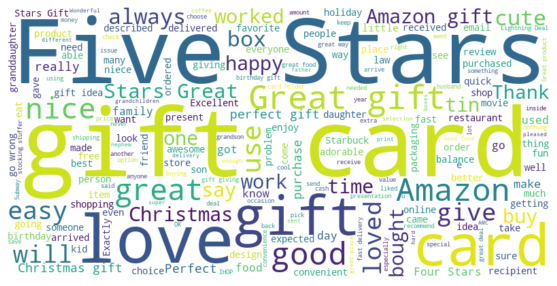

In [21]:
#Wordcloud after pre-processing 
from wordcloud import WordCloud

text_data = " ".join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# Sample of 1000 registers

sample_df = df.sample(n=1000, random_state=42)
sample_df

,overall,label,text
2443,5,Positive,What a better gift to give than Amazon gift card. Amazon gift card
2082,5,Positive,Gift....they liked it. :-) they liked it.
1347,5,Positive,My Grand daughter was very happy with this. Five Stars
1510,5,Positive,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!
345,5,Positive,Great buy Five Stars
...,...,...,...
311,5,Positive,"Love Cracker Barrel and especially gift cards. It's a great country food type of place to eat.\nEvery one that I have been to has great service, great food and the gift card makes paying so much faster. Gotta Love Cracker Barrell!"
882,5,Positive,This gift will work for a six year old little girl. Great
1683,5,Positive,"So happy to know I can get my gift cards from Amazon. I may never leave the house! I always get this for my son and daughter in law for Christmas. Sometimes it's a hassle finding a store that carries the movie and restaurant card. So, I was very happy to see this. Came really fast (like two days or less) and looks great. I will continue buying through Amazon. So happy to know I can get my gift cards from ..."
2174,5,Positive,Great for small gifts for the youngsters in our family. Chili gift card


In [23]:
# len of the text
sample_df['text_len'] = sample_df['text'].apply(str).apply(len)
sample_df


,overall,label,text,text_len
2443,5,Positive,What a better gift to give than Amazon gift card. Amazon gift card,66
2082,5,Positive,Gift....they liked it. :-) they liked it.,42
1347,5,Positive,My Grand daughter was very happy with this. Five Stars,54
1510,5,Positive,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!,112
345,5,Positive,Great buy Five Stars,20
...,...,...,...,...
311,5,Positive,"Love Cracker Barrel and especially gift cards. It's a great country food type of place to eat.\nEvery one that I have been to has great service, great food and the gift card makes paying so much faster. Gotta Love Cracker Barrell!",229
882,5,Positive,This gift will work for a six year old little girl. Great,57
1683,5,Positive,"So happy to know I can get my gift cards from Amazon. I may never leave the house! I always get this for my son and daughter in law for Christmas. Sometimes it's a hassle finding a store that carries the movie and restaurant card. So, I was very happy to see this. Came really fast (like two days or less) and looks great. I will continue buying through Amazon. So happy to know I can get my gift cards from ...",417
2174,5,Positive,Great for small gifts for the youngsters in our family. Chili gift card,71


In [24]:
# Labelling the data based on “rating of the product”:

def label_rating(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"
    else:
        return "Unknown"

sample_df['label'] = sample_df['overall'].apply(label_rating)
sample_df

,overall,label,text,text_len
2443,5,Positive,What a better gift to give than Amazon gift card. Amazon gift card,66
2082,5,Positive,Gift....they liked it. :-) they liked it.,42
1347,5,Positive,My Grand daughter was very happy with this. Five Stars,54
1510,5,Positive,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!,112
345,5,Positive,Great buy Five Stars,20
...,...,...,...,...
311,5,Positive,"Love Cracker Barrel and especially gift cards. It's a great country food type of place to eat.\nEvery one that I have been to has great service, great food and the gift card makes paying so much faster. Gotta Love Cracker Barrell!",229
882,5,Positive,This gift will work for a six year old little girl. Great,57
1683,5,Positive,"So happy to know I can get my gift cards from Amazon. I may never leave the house! I always get this for my son and daughter in law for Christmas. Sometimes it's a hassle finding a store that carries the movie and restaurant card. So, I was very happy to see this. Came really fast (like two days or less) and looks great. I will continue buying through Amazon. So happy to know I can get my gift cards from ...",417
2174,5,Positive,Great for small gifts for the youngsters in our family. Chili gift card,71


In [25]:
# Select the 'reviewText' and 'sentiment' columns
text_df = sample_df[['text', 'label', 'text_len']]

Positive    969
Neutral      18
Negative     13
Name: label, dtype: int64


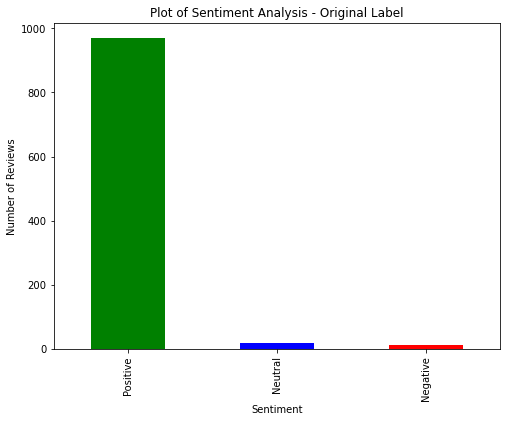

In [26]:
#Sentiments of the original Text

# Count the occurrences of each sentiment
sentiment_counts = text_df['label'].value_counts()
print(sentiment_counts)

# Bar Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - Original Label')
plt.show()

## 3. Study the below three Lexicons packages

After to do research about VADER, TextBlob and SENTIWORDNET, we dediced to use VADER and TextBlob for our implementation

## 4. Pre-process your text

- For model VADER, we don't need to do preprocessing because it supports a proper handling of sentences.
- For model TextBlob, we need to do some proprocessing steps.

In [27]:
# Pre-processing required to apply textBlob

def preprocess_text(text):
    try:
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
    except:
        pass
    
    try:
        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
    except:
        pass

    # Remove digits
    text = re.sub(r'\d+', '', text)

    #lower case corpus
     #text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Removing trailing whitespaces
    text = ' '.join([token for token in text.split()])
    
    # Handle the contractions
    expanded_text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(expanded_text)

    # Stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text


In [28]:
# Applying pre-processing
text_df['text_preprocessed'] = text_df['text'].apply(preprocess_text)

text_df.head(20)

,text,label,text_len,text_preprocessed
2443,What a better gift to give than Amazon gift card. Amazon gift card,Positive,66,better gift give Amazon gift card Amazon gift card
2082,Gift....they liked it. :-) they liked it.,Positive,42,Giftthey liked liked
1347,My Grand daughter was very happy with this. Five Stars,Positive,54,Grand daughter happy Five Stars
1510,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!,Positive,112,Perfect gift coworkersespecially many great movies around holiday season Good movie fun
345,Great buy Five Stars,Positive,20,Great buy Five Stars
524,ez x-mas shopping A+,Positive,20,ez xmas shopping
2177,Whoever gets these from Christmas will love them. Love eating there myself. Chili's gift cards,Positive,94,Whoever gets Christmas love Love eating Chilis gift cards
755,Prefect gift for my daughter. She goes there all the time and loves the holiday look so we got her this. Came quick with no problems All good!,Positive,142,Prefect gift daughter goes time loves holiday look got Came quick problems good
1570,"Easy to use, no need to carry cash, swipe and go, what else can be said really. BK Gift card",Positive,92,Easy use need carry cash swipe go else said really BK Gift card
343,loved it great,Positive,14,loved great


## 5. Modeling (Sentiment Analysis) Lexicon

### TextBlob

In [29]:
# Function to get sentiment from polarity for TextBlob

def get_sentiment(polarity):
    if -0.2 <= polarity <= 0.2:
        return 'Neutral'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [30]:
text_df['label_textblob'] = text_df['text_preprocessed'].apply(lambda x: get_sentiment(TextBlob(x).sentiment.polarity))
text_df

,text,label,text_len,text_preprocessed,label_textblob
2443,What a better gift to give than Amazon gift card. Amazon gift card,Positive,66,better gift give Amazon gift card Amazon gift card,Positive
2082,Gift....they liked it. :-) they liked it.,Positive,42,Giftthey liked liked,Positive
1347,My Grand daughter was very happy with this. Five Stars,Positive,54,Grand daughter happy Five Stars,Positive
1510,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!,Positive,112,Perfect gift coworkersespecially many great movies around holiday season Good movie fun,Positive
345,Great buy Five Stars,Positive,20,Great buy Five Stars,Positive
...,...,...,...,...,...
311,"Love Cracker Barrel and especially gift cards. It's a great country food type of place to eat.\nEvery one that I have been to has great service, great food and the gift card makes paying so much faster. Gotta Love Cracker Barrell!",Positive,229,Love Cracker Barrel especially gift cards great country food type place eat Every one great service great food gift card makes paying much faster Got Love Cracker Barrell,Positive
882,This gift will work for a six year old little girl. Great,Positive,57,gift work six year old little girl Great,Positive
1683,"So happy to know I can get my gift cards from Amazon. I may never leave the house! I always get this for my son and daughter in law for Christmas. Sometimes it's a hassle finding a store that carries the movie and restaurant card. So, I was very happy to see this. Came really fast (like two days or less) and looks great. I will continue buying through Amazon. So happy to know I can get my gift cards from ...",Positive,417,happy know get gift cards Amazon may never leave house always get son daughter law Christmas Sometimes hassle finding store carries movie restaurant card happy see Came really fast like two days less looks great continue buying Amazon happy know get gift cards,Positive
2174,Great for small gifts for the youngsters in our family. Chili gift card,Positive,71,Great small gifts youngsters family Chili gift card,Positive


Positive    743
Neutral     242
Negative     15
Name: label_textblob, dtype: int64


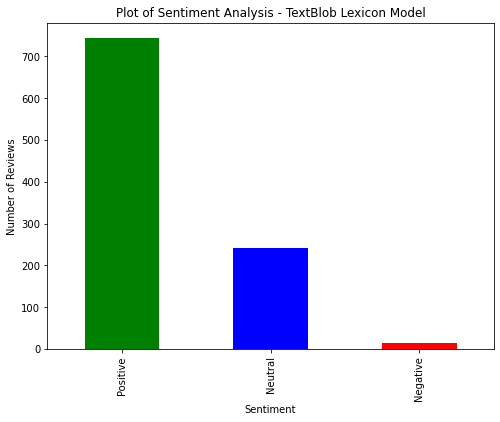

In [31]:
#Sentiments from TextBlob

sentiment_counts = text_df['label_textblob'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - TextBlob Lexicon Model')
plt.show()

### Valence Aware Dictionary and Sentiment Reasoner (VADER)

In [32]:
# Function to get sentiment from polarity for Vader

def get_sentiment_byVader(compound):
    if -0.2 <= compound <= 0.2:
        return 'Neutral'
    elif compound > 0.2:
        return 'Positive'
    else:
        return 'Negative'

In [33]:
text_df['label_vader'] = text_df['text'].apply(lambda x: get_sentiment_byVader(SentimentIntensityAnalyzer().polarity_scores(x)["compound"]))
text_df

,text,label,text_len,text_preprocessed,label_textblob,label_vader
2443,What a better gift to give than Amazon gift card. Amazon gift card,Positive,66,better gift give Amazon gift card Amazon gift card,Positive,Positive
2082,Gift....they liked it. :-) they liked it.,Positive,42,Giftthey liked liked,Positive,Positive
1347,My Grand daughter was very happy with this. Five Stars,Positive,54,Grand daughter happy Five Stars,Positive,Positive
1510,Perfect gift for coworkers...especially with so many great movies out around the holiday season. Good movie fun!,Positive,112,Perfect gift coworkersespecially many great movies around holiday season Good movie fun,Positive,Positive
345,Great buy Five Stars,Positive,20,Great buy Five Stars,Positive,Positive
...,...,...,...,...,...,...
311,"Love Cracker Barrel and especially gift cards. It's a great country food type of place to eat.\nEvery one that I have been to has great service, great food and the gift card makes paying so much faster. Gotta Love Cracker Barrell!",Positive,229,Love Cracker Barrel especially gift cards great country food type place eat Every one great service great food gift card makes paying much faster Got Love Cracker Barrell,Positive,Positive
882,This gift will work for a six year old little girl. Great,Positive,57,gift work six year old little girl Great,Positive,Positive
1683,"So happy to know I can get my gift cards from Amazon. I may never leave the house! I always get this for my son and daughter in law for Christmas. Sometimes it's a hassle finding a store that carries the movie and restaurant card. So, I was very happy to see this. Came really fast (like two days or less) and looks great. I will continue buying through Amazon. So happy to know I can get my gift cards from ...",Positive,417,happy know get gift cards Amazon may never leave house always get son daughter law Christmas Sometimes hassle finding store carries movie restaurant card happy see Came really fast like two days less looks great continue buying Amazon happy know get gift cards,Positive,Positive
2174,Great for small gifts for the youngsters in our family. Chili gift card,Positive,71,Great small gifts youngsters family Chili gift card,Positive,Positive


Positive    901
Neutral      83
Negative     16
Name: label_vader, dtype: int64


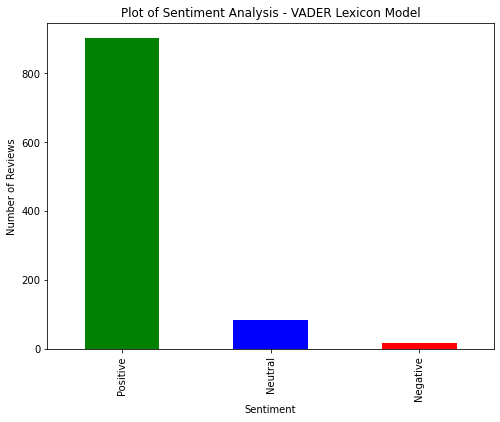

In [34]:
#Sentiments from VADER

sentiment_counts = text_df['label_vader'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Plot of Sentiment Analysis - VADER Lexicon Model')
plt.show()

### 6. Validate the results of both models and provide a comparision table.

In [35]:
# Accuracy

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

acc_score_vader = accuracy_score(text_df['label'],text_df['label_vader'])
print(acc_score_vader)

acc_score_textblob = accuracy_score(text_df['label'],text_df['label_textblob'])
print(acc_score_textblob)

0.88
0.736


#### Analysis of VADER

In [36]:
acc_score_vader = accuracy_score(text_df['label'],text_df['label_vader'])
print("Accuracy for VADER is:", acc_score_vader)
print("Confusion Matrix for VADER:")
print(confusion_matrix(text_df['label'],text_df['label_vader']))

Accuracy for VADER is: 0.88
Confusion Matrix for VADER:
[[  2   3   8]
 [  1   1  16]
 [ 13  79 877]]


In [37]:
print("Classification Report for VADER:")
print(classification_report(text_df['label'],text_df['label_vader']))

Classification Report for VADER:
              precision    recall  f1-score   support

    Negative       0.12      0.15      0.14        13
     Neutral       0.01      0.06      0.02        18
    Positive       0.97      0.91      0.94       969

    accuracy                           0.88      1000
   macro avg       0.37      0.37      0.37      1000
weighted avg       0.95      0.88      0.91      1000



#### Analysis of TextBlob

In [38]:
acc_score_textblob = accuracy_score(text_df['label'],text_df['label_textblob'])
print("Accuracy for TextBlob is:", acc_score_textblob)
print("Confusion Matrix for TextBlob:")
print(confusion_matrix(text_df['label'],text_df['label_textblob']))

Accuracy for TextBlob is: 0.736
Confusion Matrix for TextBlob:
[[  0  12   1]
 [  0   6  12]
 [ 15 224 730]]


In [39]:
print("Classification Report for TextBlob:")
print(classification_report(text_df['label'],text_df['label_textblob']))

Classification Report for TextBlob:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.02      0.33      0.05        18
    Positive       0.98      0.75      0.85       969

    accuracy                           0.74      1000
   macro avg       0.34      0.36      0.30      1000
weighted avg       0.95      0.74      0.83      1000

